## Data Preparation

In [1]:
import pandas as pd

In [7]:
df = pd.read_csv('data/train_preprocess.tsv.txt', sep='\t', names = ['content', 'sentiment'])
df.head()

,content,sentiment
0,warung ini dimiliki oleh pengusaha pabrik tahu...,positive
1,mohon ulama lurus dan k212 mmbri hujjah partai...,neutral
2,lokasi strategis di jalan sumatera bandung . t...,positive
3,betapa bahagia nya diri ini saat unboxing pake...,positive
4,duh . jadi mahasiswa jangan sombong dong . kas...,negative


In [8]:
df.shape

(11000, 2)

## Kita cek isi datasetnya dan di dalamnya terdapat 11000 data. Terdiri dari

In [9]:
df.sentiment.value_counts()

sentiment
positive    6416
negative    3436
neutral     1148
Name: count, dtype: int64

## Cleansing Dataset

In [10]:
import re

def cleansing(sent):
    string = sent.lower()
    string = re.sub(r'[^a-z0-9A-Z]', ' ', string)
    return string

In [11]:
df['content_clean'] = df.content.apply(cleansing)

In [12]:
df.head(10)

,content,sentiment,content_clean
0,warung ini dimiliki oleh pengusaha pabrik tahu...,positive,warung ini dimiliki oleh pengusaha pabrik tahu...
1,mohon ulama lurus dan k212 mmbri hujjah partai...,neutral,mohon ulama lurus dan k212 mmbri hujjah partai...
2,lokasi strategis di jalan sumatera bandung . t...,positive,lokasi strategis di jalan sumatera bandung t...
3,betapa bahagia nya diri ini saat unboxing pake...,positive,betapa bahagia nya diri ini saat unboxing pake...
4,duh . jadi mahasiswa jangan sombong dong . kas...,negative,duh jadi mahasiswa jangan sombong dong kas...
5,"makanan beragam , harga makanan di food stall ...",positive,makanan beragam harga makanan di food stall ...
6,pakai kartu kredit bca tidak untung malah rugi...,negative,pakai kartu kredit bca tidak untung malah rugi...
7,"tempat unik , bagus buat foto , makanan enak ,...",positive,tempat unik bagus buat foto makanan enak ...
8,saya bersama keluarga baru saja menikmati peng...,positive,saya bersama keluarga baru saja menikmati peng...
9,bersyukur,positive,bersyukur


In [13]:
data = df[['content','sentiment']]
data.head()

,content,sentiment
0,warung ini dimiliki oleh pengusaha pabrik tahu...,positive
1,mohon ulama lurus dan k212 mmbri hujjah partai...,neutral
2,lokasi strategis di jalan sumatera bandung . t...,positive
3,betapa bahagia nya diri ini saat unboxing pake...,positive
4,duh . jadi mahasiswa jangan sombong dong . kas...,negative


In [14]:
#Cleaning
import re
import string
import nltk

#remove URL
def remove_URL(tweet):
  url = re.compile(r'https?://\S+|www\.\S+')
  return url.sub(r'', tweet)

#Remove Emoji
def remove_emoji(tweet):
  emoji_pattern = re.compile("["
  u"\U0001F600-\U0001F64F"
  u"\U0001F300-\U0001F5FF"
  u"\U0001F1E0-\U0001F1FF"
                      "]+", flags=re.UNICODE)
  return emoji_pattern.sub(r'', tweet)

#remove html
def remove_html(tweet):
  html = re.compile(r'<.*?>')
  return html.sub(r'', tweet)

# remove numbers
def remove_numbers(tweet):
    numbers = re.sub(r'\d+', '', tweet)
    return numbers

#menghapus symbol
def remove_symbols(tweet):
    symbols = re.sub(r'[^a-zA-Z0-9\s]', '', tweet)  # Menghapus semua karakter yang bukan huruf, angka, atau spasi
    return symbols

#menghapus kata kata random
def remove_random_words(tweet):
    # Menghapus kata-kata yang terlihat seperti urutan karakter acak
    random_words = re.sub(r'\b\w{10,}\b', '', tweet)
    return random_words

data['content_clean'] = data['content'].apply(lambda x: remove_URL(x))
data['content_clean'] = data['content_clean'].apply(lambda x: remove_emoji(x))
data['content_clean'] = data['content_clean'].apply(lambda x: remove_html(x))
data['content_clean'] = data['content_clean'].apply(lambda x: remove_numbers(x))
data['content_clean'] = data['content_clean'].apply(lambda x: remove_symbols(x))
data['content_clean'] = data['content_clean'].apply(lambda x: remove_random_words(x))


data.head()

,content,sentiment,content_clean
0,warung ini dimiliki oleh pengusaha pabrik tahu...,positive,warung ini dimiliki oleh pengusaha pabrik tahu...
1,mohon ulama lurus dan k212 mmbri hujjah partai...,neutral,mohon ulama lurus dan k mmbri hujjah partai ap...
2,lokasi strategis di jalan sumatera bandung . t...,positive,lokasi strategis di jalan sumatera bandung te...
3,betapa bahagia nya diri ini saat unboxing pake...,positive,betapa bahagia nya diri ini saat unboxing pake...
4,duh . jadi mahasiswa jangan sombong dong . kas...,negative,duh jadi mahasiswa jangan sombong dong kasih...


In [15]:
neg = df.loc[df['sentiment'] == 'negative'].content_clean.tolist()
neu = df.loc[df['sentiment'] == 'neutral'].content_clean.tolist()
pos = df.loc[df['sentiment'] == 'positive'].content_clean.tolist()

neg_sentiment = df.loc[df['sentiment'] == 'negative'].sentiment.tolist()
neu_sentiment = df.loc[df['sentiment'] == 'neutral'].sentiment.tolist()
pos_sentiment = df.loc[df['sentiment'] == 'positive'].sentiment.tolist()

In [16]:
total_data = pos + neu + neg
sentiments = pos_sentiment + neu_sentiment + neg_sentiment

print("Pos: %s, Neu: %s, Neg: %s" % (len(pos), len(neu), len(neg)))
print("Total data: %s" % len(total_data))

Pos: 6416, Neu: 1148, Neg: 3436
Total data: 11000


## Feature Extraction

In [50]:
import pickle
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from collections import defaultdict

max_features = 100000
tokenizer = Tokenizer(num_words=max_features, split=' ', lower=True)
tokenizer.fit_on_texts(total_data)
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)
    print("tokenizer.pickle has created!")

X = tokenizer.texts_to_sequences(total_data)

vocab_size = len(tokenizer.word_index)
maxlen = max(len(x) for x in X)

X = pad_sequences(X)
with open('x_pad_sequences.pickle', 'wb') as handle:
    pickle.dump(X, handle, protocol=pickle.HIGHEST_PROTOCOL)
    print("x_pad_sequences.pickle has created!")

tokenizer.pickle has created!
x_pad_sequences.pickle has created!


In [51]:
Y = pd.get_dummies(sentiments)
Y = Y.values

with open('y_labels.pickle', 'wb') as handle:
    pickle.dump(Y, handle, protocol=pickle.HIGHEST_PROTOCOL)
    print("y_labels.pickle has created!")

y_labels.pickle has created!


In [19]:
Y

array([[False, False,  True],
       [False, False,  True],
       [False, False,  True],
       ...,
       [ True, False, False],
       [ True, False, False],
       [ True, False, False]])

In [20]:
sentiments

['positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',

## Split Dataset

In [47]:
from sklearn.model_selection import train_test_split

file = open("x_pad_sequences.pickle",'rb')
X = pickle.load(file)
file.close()

file = open("y_labels.pickle",'rb')
Y = pickle.load(file)
file.close()

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

# **Training**

In [22]:
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D, SimpleRNN, Activation
from keras import optimizers
from keras.callbacks import EarlyStopping, TensorBoard
from keras.layers import Flatten
from keras import backend as K

In [48]:
import sys

# Check if a virtual environment is active
is_virtualenv = hasattr(sys, 'real_prefix') or (hasattr(sys, 'base_prefix') and sys.base_prefix != sys.prefix)

if is_virtualenv:
    print("A virtual environment is active.")
else:
    print("No virtual environment is active.")


No virtual environment is active.


In [45]:
import numpy as np
from keras import layers
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D, SimpleRNN, Activation
from keras import optimizers
from keras.callbacks import EarlyStopping, TensorBoard
from keras.layers import Flatten
from keras import backend as K

In [25]:
embed_dim = 100
units = 64

model = Sequential()
model.add(Embedding(max_features, embed_dim, input_length=X.shape[1]))
model.add(LSTM(units, dropout=0.2))
model.add(Dense(3,activation='softmax'))
model.compile(loss = 'binary_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(model.summary())

adam = optimizers.Adam(lr = 0.0001)
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=2)    
history = model.fit(X_train, y_train, epochs=10, batch_size=10, validation_data=(X_test, y_test), verbose=1, callbacks=[es])
# history = model.fit(X_train, y_train, epochs=10, batch_size=10, validation_data=(X_test, y_test), verbose=1)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 96, 100)           10000000  
                                                                 
 lstm (LSTM)                 (None, 64)                42240     
                                                                 
 dense (Dense)               (None, 3)                 195       
                                                                 
Total params: 10042435 (38.31 MB)
Trainable params: 10042435 (38.31 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


None
Epoch 1/10
880/880 [==============================] - 179s 202ms/step - loss: 0.4540 - accuracy: 0.8158 - val_loss: 0.3255 - val_accuracy: 0.8845
Epoch 2/10
880/880 [==============================] - 178s 203ms/step - loss: 0.1983 - accuracy: 0.9294 - val_loss: 0.3401 - val_accuracy: 0.8732
Epoch 3/10
880/880 [==============================] - 178s 202ms/step - loss: 0.1052 - accuracy: 0.9594 - val_loss: 0.3874 - val_accuracy: 0.8718
Epoch 3: early stopping


## Evaluation

In [26]:
from sklearn import metrics

predictions = model.predict(X_test)
y_pred = predictions
matrix_test = metrics.classification_report(y_test.argmax(axis=1), y_pred.argmax(axis=1))
print("Testing selesai")
print(matrix_test)

69/69 [==============================] - 6s 19ms/step
Testing selesai
              precision    recall  f1-score   support

           0       0.84      0.81      0.83       685
           1       0.85      0.70      0.77       233
           2       0.89      0.94      0.91      1282

    accuracy                           0.87      2200
   macro avg       0.86      0.82      0.84      2200
weighted avg       0.87      0.87      0.87      2200



## Cross Validation

In [27]:
import numpy as np
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold

kf = KFold(n_splits=5,random_state=42,shuffle=True)

accuracies = []

y = Y

embed_dim = 100
units = 64

for iteration, data in enumerate(kf.split(X), start=1):

    data_train   = X[data[0]]
    target_train = y[data[0]]

    data_test    = X[data[1]]
    target_test  = y[data[1]]

    model = Sequential()
    model.add(Embedding(max_features, embed_dim, input_length=X.shape[1]))
    model.add(LSTM(units, dropout=0.5))
    model.add(Dense(3,activation='softmax'))
    sgd = optimizers.Adam(learning_rate= 0.0001)
    model.compile(loss = 'binary_crossentropy', optimizer='adam',metrics = ['accuracy'])

    adam = optimizers.Adam(lr = 0.0001)
    model.compile(loss = 'categorical_crossentropy', optimizer = adam, metrics = ['accuracy'])

    es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=2)
    history = model.fit(X_train, y_train, epochs=10, batch_size=10, validation_data=(X_test, y_test), verbose=1, callbacks=[es])

    predictions = model.predict(X_test)
    y_pred = predictions

    # for the current fold only    
    accuracy = accuracy_score(y_test.argmax(axis=1), y_pred.argmax(axis=1))

    print("Training ke-", iteration)
    print(classification_report(y_test.argmax(axis=1), y_pred.argmax(axis=1)))
    print("======================================================")

    accuracies.append(accuracy)

# this is the average accuracy over all folds
average_accuracy = np.mean(accuracies)

print()
print()
print()
print("Rata-rata Accuracy: ", average_accuracy)

Epoch 1/10
880/880 [==============================] - 174s 195ms/step - loss: 0.4669 - accuracy: 0.8107 - val_loss: 0.3344 - val_accuracy: 0.8727
Epoch 2/10
880/880 [==============================] - 155s 176ms/step - loss: 0.2202 - accuracy: 0.9174 - val_loss: 0.3259 - val_accuracy: 0.8768
Epoch 3/10
880/880 [==============================] - 158s 180ms/step - loss: 0.1379 - accuracy: 0.9495 - val_loss: 0.4140 - val_accuracy: 0.8627
Epoch 4/10
880/880 [==============================] - 155s 176ms/step - loss: 0.0874 - accuracy: 0.9645 - val_loss: 0.4975 - val_accuracy: 0.8605
Epoch 4: early stopping
69/69 [==============================] - 2s 18ms/step
Training ke- 1
              precision    recall  f1-score   support

           0       0.85      0.75      0.80       685
           1       0.85      0.73      0.79       233
           2       0.87      0.94      0.90      1282

    accuracy                           0.86      2200
   macro avg       0.86      0.81      0.83      22

Epoch 1/10
880/880 [==============================] - 159s 178ms/step - loss: 0.4693 - accuracy: 0.8153 - val_loss: 0.3624 - val_accuracy: 0.8595
Epoch 2/10
880/880 [==============================] - 156s 178ms/step - loss: 0.2274 - accuracy: 0.9192 - val_loss: 0.3530 - val_accuracy: 0.8782
Epoch 3/10
880/880 [==============================] - 152s 173ms/step - loss: 0.1420 - accuracy: 0.9459 - val_loss: 0.3853 - val_accuracy: 0.8759
Epoch 4/10
880/880 [==============================] - 154s 175ms/step - loss: 0.0895 - accuracy: 0.9672 - val_loss: 0.4636 - val_accuracy: 0.8686
Epoch 4: early stopping
69/69 [==============================] - 2s 16ms/step
Training ke- 2
              precision    recall  f1-score   support

           0       0.82      0.83      0.82       685
           1       0.83      0.69      0.76       233
           2       0.90      0.92      0.91      1282

    accuracy                           0.87      2200
   macro avg       0.85      0.81      0.83      22

Epoch 1/10
880/880 [==============================] - 152s 171ms/step - loss: 0.4779 - accuracy: 0.8107 - val_loss: 0.3428 - val_accuracy: 0.8764
Epoch 2/10
880/880 [==============================] - 145s 165ms/step - loss: 0.2301 - accuracy: 0.9152 - val_loss: 0.3362 - val_accuracy: 0.8764
Epoch 3/10
880/880 [==============================] - 140s 159ms/step - loss: 0.1273 - accuracy: 0.9535 - val_loss: 0.3657 - val_accuracy: 0.8732
Epoch 4/10
880/880 [==============================] - 137s 156ms/step - loss: 0.0836 - accuracy: 0.9688 - val_loss: 0.4494 - val_accuracy: 0.8723
Epoch 4: early stopping
69/69 [==============================] - 4s 18ms/step
Training ke- 3
              precision    recall  f1-score   support

           0       0.80      0.88      0.84       685
           1       0.83      0.72      0.77       233
           2       0.93      0.89      0.91      1282

    accuracy                           0.87      2200
   macro avg       0.85      0.83      0.84      22

Epoch 1/10
880/880 [==============================] - 139s 156ms/step - loss: 0.4739 - accuracy: 0.8150 - val_loss: 0.3312 - val_accuracy: 0.8773
Epoch 2/10
880/880 [==============================] - 149s 170ms/step - loss: 0.2253 - accuracy: 0.9157 - val_loss: 0.3240 - val_accuracy: 0.8750
Epoch 3/10
880/880 [==============================] - 157s 179ms/step - loss: 0.1337 - accuracy: 0.9474 - val_loss: 0.3779 - val_accuracy: 0.8718
Epoch 4/10
880/880 [==============================] - 159s 180ms/step - loss: 0.0859 - accuracy: 0.9685 - val_loss: 0.4182 - val_accuracy: 0.8809
Epoch 4: early stopping
69/69 [==============================] - 2s 21ms/step
Training ke- 4
              precision    recall  f1-score   support

           0       0.89      0.78      0.83       685
           1       0.81      0.81      0.81       233
           2       0.89      0.95      0.92      1282

    accuracy                           0.88      2200
   macro avg       0.86      0.84      0.85      22

Epoch 1/10
880/880 [==============================] - 159s 178ms/step - loss: 0.4721 - accuracy: 0.8139 - val_loss: 0.3244 - val_accuracy: 0.8800
Epoch 2/10
880/880 [==============================] - 154s 174ms/step - loss: 0.2263 - accuracy: 0.9166 - val_loss: 0.3346 - val_accuracy: 0.8805
Epoch 3/10
880/880 [==============================] - 164s 186ms/step - loss: 0.1367 - accuracy: 0.9494 - val_loss: 0.3900 - val_accuracy: 0.8736
Epoch 3: early stopping
69/69 [==============================] - 2s 24ms/step
Training ke- 5
              precision    recall  f1-score   support

           0       0.82      0.84      0.83       685
           1       0.87      0.69      0.77       233
           2       0.90      0.93      0.91      1282

    accuracy                           0.87      2200
   macro avg       0.86      0.82      0.84      2200
weighted avg       0.87      0.87      0.87      2200




Rata-rata Accuracy:  0.8711818181818183


Hasilnya nilai rata-rata accuracy pada angka 0.87. Ini menunjukkan model kita cukup stabil pada angka 0.87.

## Visualization

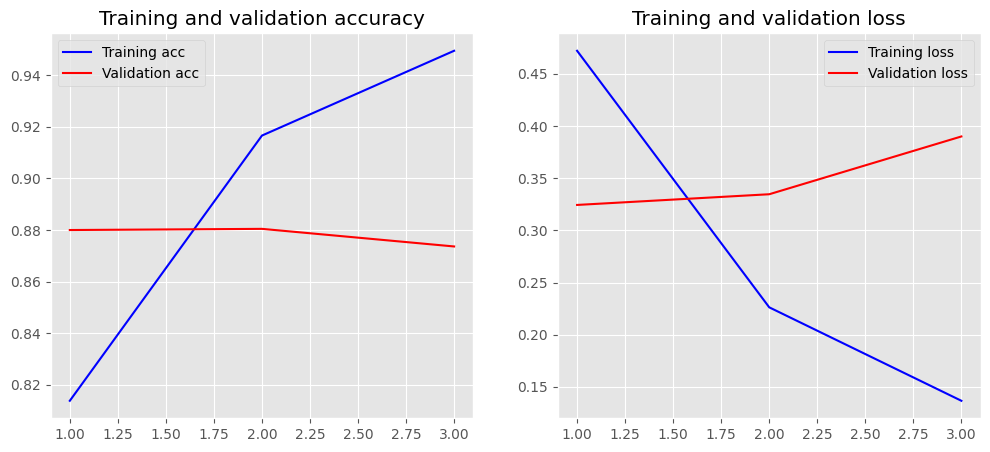

In [28]:
# history.history
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

%matplotlib inline
plot_history(history)

In [39]:
model.save('model_lstm.h5')
print("Model has created!")

Model has created!


In [46]:
import re 
from keras.models import load_model

input_text = """
syukurlah.
"""

def cleansing(sent):
    # Mengubah kata menjadi huruf kecil semua dengan menggunakan fungsi lower()
    string = sent.lower()
    # Menghapus emoticon dan tanda baca menggunakan "RegEx" dengan script di bawah
    string = re.sub(r'[^a-zA-Z0-9]', ' ', string)
    return string

sentiment = ['negative', 'neutral', 'positive']

text = [cleansing(input_text)]
predicted = tokenizer.texts_to_sequences(text)
guess = pad_sequences(predicted, maxlen=X.shape[1])

model = load_model('model_of_lstm/model_lstm.h5')
prediction = model.predict(guess)
polarity = np.argmax(prediction[0])

print("Text: ",text[0])
print("Sentiment: ",sentiment[polarity])

1/1 [==============================] - 1s 539ms/step
Text:   syukurlah  
Sentiment:  positive


In [43]:
import re 
from keras.models import load_model

input_text = """
disaat semua cowok berusaha melacak perhatian gue. loe lantas remehkan perhatian yg gue kasih khusus ke elo. basic elo cowok bego 
"""

def cleansing(sent):
    # Mengubah kata menjadi huruf kecil semua dengan menggunakan fungsi lower()
    string = sent.lower()
    # Menghapus emoticon dan tanda baca menggunakan "RegEx" dengan script di bawah
    string = re.sub(r'[^a-zA-Z0-9]', ' ', string)
    return string

sentiment = ['negative', 'neutral', 'positive']

text = [cleansing(input_text)]
predicted = tokenizer.texts_to_sequences(text)
guess = pad_sequences(predicted, maxlen=X.shape[1])

model = load_model('model_of_lstm/model_lstm.h5')
prediction = model.predict(guess)
polarity = np.argmax(prediction[0])

print("Text: ",text[0])
print("Sentiment: ",sentiment[polarity])

1/1 [==============================] - 0s 370ms/step
Text:   disaat semua cowok berusaha melacak perhatian gue  loe lantas remehkan perhatian yg gue kasih khusus ke elo  basic elo cowok bego  
Sentiment:  negative


In [44]:
import re 
from keras.models import load_model

input_text = """
Susilo Bambang Yudhoyono Presiden RI ke 6 meminta Khofifah Emil untuk dekat dengan masyarakat 
"""

def cleansing(sent):
    # Mengubah kata menjadi huruf kecil semua dengan menggunakan fungsi lower()
    string = sent.lower()
    # Menghapus emoticon dan tanda baca menggunakan "RegEx" dengan script di bawah
    string = re.sub(r'[^a-zA-Z0-9]', ' ', string)
    return string

sentiment = ['negative', 'neutral', 'positive']

text = [cleansing(input_text)]
predicted = tokenizer.texts_to_sequences(text)
guess = pad_sequences(predicted, maxlen=X.shape[1])

model = load_model('model_of_lstm/model_lstm.h5')
prediction = model.predict(guess)
polarity = np.argmax(prediction[0])

print("Text: ",text[0])
print("Sentiment: ",sentiment[polarity])

1/1 [==============================] - 1s 1s/step
Text:   susilo bambang yudhoyono presiden ri ke 6 meminta khofifah emil untuk dekat dengan masyarakat  
Sentiment:  neutral
